# Enrichment analysis
This is a notebook giving an example runthrough of how to do an enrichment analysis of processed data.
It makes use of the cytominer_eval functions built by Greg and myself.

In [2]:
import pandas as pd
import numpy as np
from cytominer_eval import evaluate
from pycytominer.cyto_utils import infer_cp_features
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import data_selection as ds

In [3]:
# import selected data from 02_clean_data.ipyvn
data_dir = '../01_data/2016_04_01_a549_48hr_batch1_consensus_modz_feature_select_dmso.csv.gz'
df = pd.read_csv(data_dir)

In [4]:
df = ds.clean_moas(df)
df = ds.drop_feats(df, 30)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
df.head()

dropped 136 features


,Metadata_Plate_Map_Name,Metadata_cell_id,Metadata_broad_sample,Metadata_pert_well,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_time_point,Metadata_moa,Metadata_target,Cells_AreaShape_FormFactor,...,Nuclei_Texture_InfoMeas2_RNA_10_0,Nuclei_Texture_InfoMeas2_RNA_20_0,Nuclei_Texture_InverseDifferenceMoment_AGP_5_0,Nuclei_Texture_InverseDifferenceMoment_DNA_20_0,Nuclei_Texture_InverseDifferenceMoment_ER_5_0,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_InverseDifferenceMoment_RNA_10_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0
1,C-7161-01-LM6-001,A549,BRD-A26032986-050-02-1,C13,10.0,6,48H,calmodulin antagonist,CALM1,-0.187122,...,-0.819698,-0.948205,0.033384,1.247290,-0.641374,1.514300,-0.361908,-0.160391,-0.928242,-0.681633
2,C-7161-01-LM6-001,A549,BRD-A26095496-001-04-0,D13,10.0,6,48H,glucocorticoid receptor agonist,NR3C1|PLA2G1B,-5.044600,...,-1.238960,-0.635335,-2.338720,2.105690,-5.430540,-5.802180,0.029379,-1.601920,-1.625970,-1.032820
4,C-7161-01-LM6-001,A549,BRD-A26690767-066-01-9,E13,10.0,6,48H,HIV protease inhibitor,CYP3A4,-0.416026,...,-1.566370,-1.608230,-0.868957,1.549610,-2.995770,-0.943642,-0.593867,-0.145932,-1.248330,-0.634703
5,C-7161-01-LM6-001,A549,BRD-A26711594-003-10-6,E19,10.0,6,48H,calcium channel blocker,ADORA3,-1.611640,...,-0.990629,-1.320840,0.637082,1.696820,-0.806278,1.045140,-0.333954,0.674326,-0.819150,-0.449688
7,C-7161-01-LM6-001,A549,BRD-A27732521-003-08-3,H01,10.0,6,48H,voltage-gated sodium channel blocker,CYP2C19|CYP2D6,-0.560182,...,0.892780,0.750292,-2.088450,0.032824,-0.212402,0.350726,1.554940,-0.151872,0.529546,0.594847


In [5]:
replicate_groups=['Metadata_moa']
result = []
p_range = np.arange(0.995, 0.96, -0.005)

enrichment_result = evaluate(
    profiles=df,
    features=features,
    meta_features=meta_features,
    replicate_groups=replicate_groups,
    operation="enrichment",
    similarity_metric="pearson",
    enrichment_percentile=p_range,
)

In [6]:
enrichment_result[["enrichment_percentile","ods_ratio"]]


,enrichment_percentile,ods_ratio
0,0.995,9.137248
1,0.990,6.825632
2,0.985,5.842771
3,0.980,5.116222
4,0.975,4.635215
5,0.970,4.305253
6,0.965,4.022292
7,0.960,3.799090


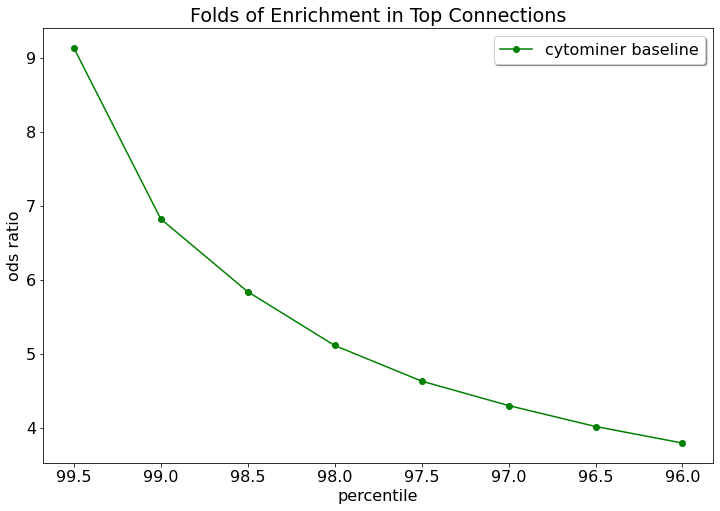

In [7]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*enrichment_result["enrichment_percentile"], enrichment_result["ods_ratio"], marker="o", color="green", label = 'cytominer baseline')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [8]:
enrichment_result.to_csv('../results/enrichment.csv', index=False)